### Analisis de incidencias delictivas en el estado de Sonora
Utilizando los datos proporcionados por el gobierno de México acerca de las incidencias delictivas en el país, se creo una base de datos filtrando la información para obtener las incidencias delictivas en el estado.

En la presente libreta se realizan las consultas necesarias para realizar un analisis de las denuncias en Sonora desde 2015 hasta 2021, finalizando con la ilustración de los datos obtenidos mediante una gráfica treemap.

#### Importamos las librerias que utilizaremos

In [1]:
import db_functions as mysql
import pandas as pd
from matplotlib import pyplot as plt
import squarify
import os

Nos conectamos a la base de datos *denuncias*

In [2]:
# Loading credentials
if(os.environ.get("DB_TYPE") == None):
    from dotenv import load_dotenv
    from config.definitions import ROOT_DIR
    print(ROOT_DIR)
    load_dotenv(os.path.join(ROOT_DIR, 'config', 'conf', '.env'))

C:/Users/abrah/Documents/Repos/data-visualization


In [3]:
connection = mysql.create_db_connection("localhost",os.environ.get("DB_USER"),os.environ.get("DB_PASS"),os.environ.get("DB_NAME"))

MySQL DB connection succesful


Para el analisis debemos tener en cuenta los siguientes puntos:
 * Utilizaremos la vista **v_delitos_son** para realizar nuestras consultas a la base de datos
 * Necesitamos filtrar la información por año.
 * Nos interesa la frecuencia con la que ocurrio un tipo de delito.
 * Realizaremos un treemap por año y uno final que contenga todos.

In [4]:
# Tipos de delito
query = """
SELECT DISTINCT TipoDelito FROM v_delitos_son;
"""

In [5]:
tipos = mysql.read_query(connection,query)

### Treemap
Función encargada de realizar la grafica de árbol.

In [6]:
def plot_treemap(query, title=""):
    norm_data = squarify.normalize_sizes([int(tipo[1]) for tipo in query],dx=7,dy=7)
    ax = squarify.plot(sizes=norm_data,alpha=1, pad=True, color=plt.cm.Set1.colors)
    ax.get_xaxis().set_visible(False)
    plt.legend(handles=ax.containers[0], labels=[i[0] for i in query],title="Tipos de delito",title_fontsize=16, loc='center left',bbox_to_anchor=(1,0.5))
    plt.axis('off')
    plt.text(50, 100,
        title,
        fontsize=20,
        zorder=30
    )
    plt.show()
    return

### Incidencias delictivas en Sonora en 1995

In [7]:
### Incidencias delictivas en Sonora en 1995
# Query
query = """
SELECT TipoDelito, SUM(Ocurrencias) FROM v_delitos_son WHERE YEAR(Fecha) = 2015 GROUP BY TipoDelito;
"""
del_1995 = mysql.read_query(connection,query)

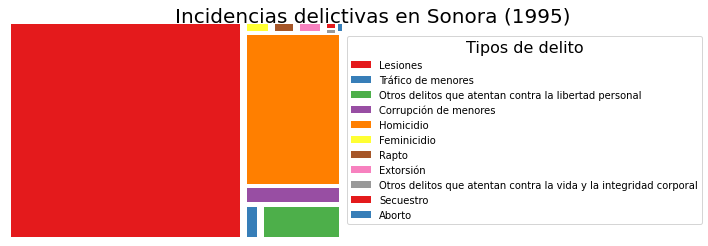

In [8]:
plot_treemap(del_1995, "Incidencias delictivas en Sonora (1995)")

---

### Incidencias delictivas en Sonora en 2021

In [9]:
# Query
query = """
SELECT TipoDelito, SUM(Ocurrencias) FROM v_delitos_son WHERE YEAR(Fecha) = 2021 GROUP BY TipoDelito;
"""
del_2021 = mysql.read_query(connection,query)

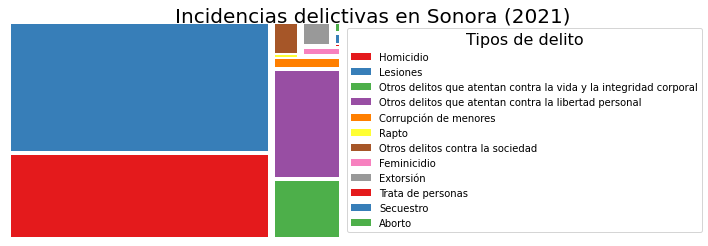

In [10]:
plot_treemap(del_2021, "Incidencias delictivas en Sonora (2021)")

---

### Incidencias delicitvas en Sonora (1995-2021)

In [11]:
# Query
query = """
SELECT TipoDelito, SUM(Ocurrencias) FROM v_delitos_son WHERE YEAR(Fecha) < 2022 GROUP BY TipoDelito;
"""
delinc = mysql.read_query(connection,query)

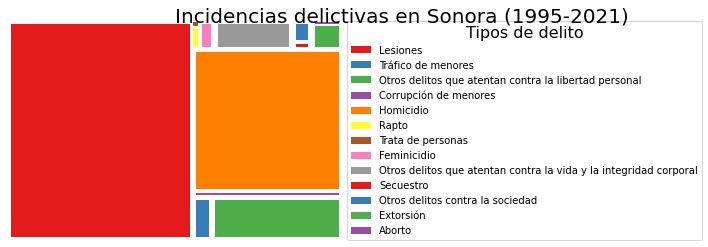

In [12]:
plot_treemap(delinc, "Incidencias delictivas en Sonora (1995-2021)")

#### Cerrando la conexión con la base de datos

In [13]:
connection.close()